In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed
%matplotlib inline
plt.rcParams["figure.figsize"] = [20, 7]

In [24]:
traj_s=[
    124.834,124.84,124.854,124.882,124.926,124.992,125.082,125.199,125.347,125.528,125.745,126,126.296,126.635,127.018,127.447,127.924,128.45,129.026,129.652,130.33,131.061,131.844,132.68,133.57,134.513,135.509,136.558,137.659,138.813,140.017,141.273,142.578,143.932,145.334,146.783,148.277,149.815,151.395,153.017,154.678,156.376,158.111,159.88,161.681,163.513,165.373,167.259,169.17,171.104,173.057,175.028,177.015,179.015,181.027,183.048,185.075,187.108,189.142,191.176,193.208,195.235,197.256,199.268,201.268,203.256,205.228,207.182,209.117,211.031,212.921,214.786,216.623,218.432,220.21,221.956,223.669,225.346,226.986,228.589,230.153,231.677,233.159,234.6,235.998,237.352,238.663,239.93,241.151,242.329,243.461,244.549,245.592,246.592,247.549,248.462,249.335,250.166,250.959,251.713,252.432,253.116,253.767,254.388,254.981,255.549,256.094,256.62,257.129,257.625,258.112
]
traj_d=[
     6.16483,6.16482,6.1648,6.16476,6.1647,6.1646,6.16447,6.1643,6.16409,6.16382,6.16351,6.16314,6.16271,6.16222,6.16167,6.16105,6.16036,6.1596,6.15877,6.15787,6.15689,6.15584,6.15471,6.15351,6.15224,6.15089,6.14946,6.14796,6.14639,6.14475,6.14303,6.14124,6.13939,6.13747,6.13548,6.13343,6.13132,6.12915,6.12692,6.12464,6.1223,6.11992,6.11749,6.11502,6.11251,6.10996,6.10737,6.10476,6.10211,6.09945,6.09676,6.09405,6.09133,6.08859,6.08585,6.0831,6.08036,6.07761,6.07487,6.07214,6.06943,6.06673,6.06405,6.06139,6.05876,6.05616,6.0536,6.05106,6.04857,6.04612,6.04371,6.04136,6.03905,6.03679,6.03459,6.03245,6.03037,6.02835,6.0264,6.02451,6.02269,6.02094,6.01926,6.01765,6.01611,6.01465,6.01326,6.01195,6.01071,6.00955,6.00846,6.00745,6.00651,6.00564,6.00485,6.00412,6.00347,6.00288,6.00236,6.0019,6.0015,6.00116,6.00087,6.00063,6.00044,6.00029,6.00018,6.0001,6.00005,6.00002,6
]
traj_t=[s *.02 for s in range(len(traj_s))]
traj=[t for t in zip(traj_t,traj_s,traj_d)]
traj_df=pd.DataFrame(data=traj,columns=['t','s','d'])

In [27]:
traj_df.head(5)

,t,s,d
0,0.00,124.834,6.16483
1,0.02,124.840,6.16482
2,0.04,124.854,6.16480
3,0.06,124.882,6.16476
4,0.08,124.926,6.16470


In [37]:
s1=141.442
s2=145.562
d1=6.32842
d2=6.27003
n_points=3
def dist(s1,s2,d1,d2):
    return math.sqrt((s2-s1)**2 + (d2-d1)**2)

def time(n_points):
    return 0.02*n_points

def velocity(s1,s2,d1,d2,n_points):
    return dist(s1,s2,d1,d2)/time(n_points)
    
velocity(s1,s2,d1,d2,n_points)

68.67356234004635

In [59]:
first_row=True
vs=[]
accel=[]
for index, row in traj_df.iterrows():
    s2=row['s']
    d2=row['d']
    if first_row:
        v2=0.0
        a=0.0
        first_row=False;
    else:
        v2=velocity(s1,s2,d1,d2,1)
        a=(v2-v1)/.02
    accel.append(a)
    vs.append(v2)
    v1=v2
    s1=s2
    d1=d2

In [60]:
traj_df['v']=vs
traj_df['a']=accel
traj_df.head()

,t,s,d,v,a
0,0.00,124.834,6.16483,0.000000,0.000000
1,0.02,124.840,6.16482,0.300000,15.000021
2,0.04,124.854,6.16480,0.700001,20.000015
3,0.06,124.882,6.16476,1.400001,35.000036
4,0.08,124.926,6.16470,2.200002,40.000031


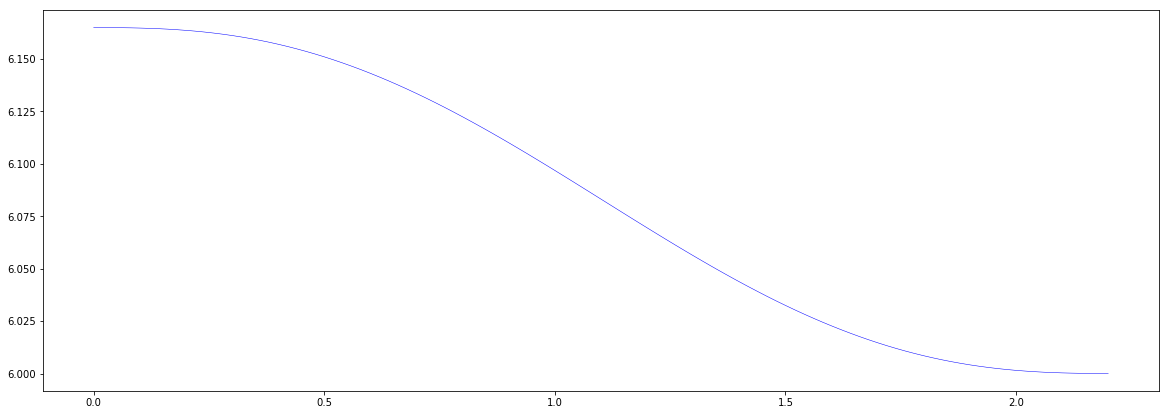

In [35]:
# plot d over t
plt.figure()
plt.plot(traj_df.t,traj_df.d,linewidth=.5,color='b')
plt.show()

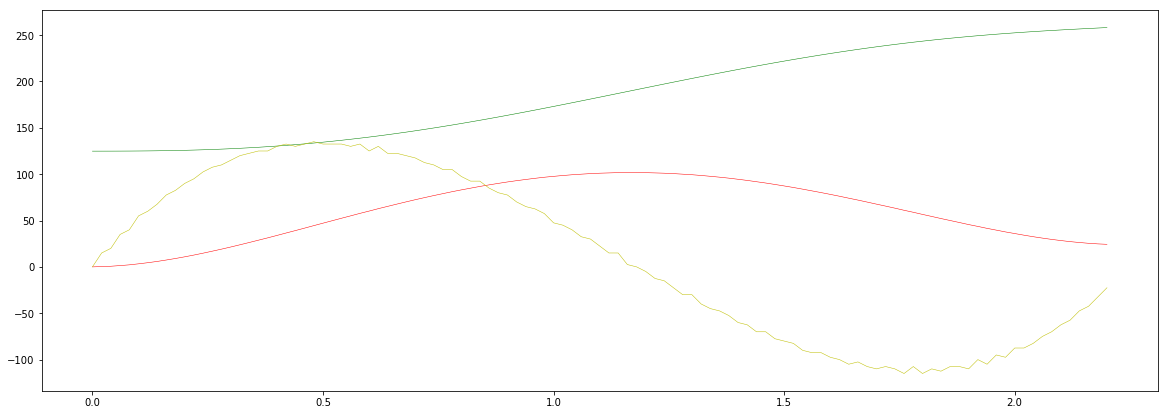

In [61]:
# plot s over t with velocity
plt.figure()
plt.plot(traj_df.t,traj_df.s,linewidth=.5,color='g')
plt.plot(traj_df.t,traj_df.v,linewidth=.5,color='r')
plt.plot(traj_df.t,traj_df.a,linewidth=.5,color='y')
plt.show()